# Notebook 6: Diseño de Base de Datos Relacional vs. Diseño de Base de Datos "NoSQL" - Normalización vs. Flexibilidad

## 3. Sintáxis JSON

JSON es el formato utilizado por la gran mayoría de los SGBDs orientados a Documentos como Mongo, CouchDB o RethinkDB. Pueden referirse a sitio web como http://www.json.org/ para más detalles sobre el formato JSON pero a continuación se recuerda algunos aspectos.

Los valores de una clave pueden ser <b>atómicos</b> (Cadena de caracteres, número o booleano):

- <code>"title": "The Social network"</code>
- <code>"year": 2010</code>
- <code>"oscar": false</code>

o pueden ser <b>valores complejos</b> (objeto añadido o lista):

- <code>"director": {firstname:"David", lastname:"Fincher"}</code>
- <code>"actors": ["Eisenberg","Mara","Garfield","Timberlake"]</code>
- <code>"mixed": ["Eisenberg", 1948, true, {nombre:"juan", edad:18}]</code>

<b>Ejercicio:</b> El documento siguiente contiene (muchos) errores. Traten de corregirla manualmente y luego validar con un corrector de JSON tipo https://jsonlint.com/.

<code>
{
"title": "Taxi driver",
"year": 1976,
"genre": "drama",
"country": "USA",
"director":
{
"last_name": "Scorcese",
first_name: "Martin",
"birth_date": "1962"
},
"actors": [
{
first_name: "Jodie",
"last_name": "Foster",
"birth_date": null,
"role": "1962"
}
{
first_name: "Robert",
"last_name": "De Niro",
"birth_date": "1943",
"role": "Travis Bickle ",
}
}
</code>

# Respuesta
<code>
{
	"title": "Taxi driver",
	"year": 1976,
	"genre": "drama",
	"country": "USA",
	"director": {
		"last_name": "Scorcese",
		"first_name": "Martin",
		"birth_date": "1962"
	},
	"actors": [
        {
			"first_name": "Jodie",
			"last_name": "Foster",
			"birth_date": null,
			"role": "1962"
		},
		{
			"first_name": "Robert",
			"last_name": "De Niro",
			"birth_date": "1943",
			"role": "Travis Bickle"
		}
	]
}
</code>

# 6. Ejercicios

1. ¿Cómo se podría transformar el documento JSON siguiente en un modelo relacional que respeta al menos las 3 primeras formas normales?

<code>
 {
 "created_at":"Thu Apr 06 15:24:15 +0000 2017",
 "id": 850006245121695744,
 "text": "1/ Today we’re sharing our vision for the future of the Twitter API platform!nhttps://t.co/XweGngmxlP",
 "user": {
    "id": 2244994945,
    "name": "TwitterDev",
    "screen_name": "TwitterDev",
    "description": "Your source for Twitter news",
    "verified": true,
    "followers_count": 477684,
    "friends_count": 1524,
    "listed_count": 1184,
    "favourites_count": 2151,
    "statuses_count": 3121,
    "created_at": "Sat Dec 14 04:35:55 +0000 2013",
    "profile_image_url_https": "https://pbs.twimg.com/"
    },  
 "entities": {
    "urls": [
    {
      "indices": [
        32,
        52
      ],
      "url": "http://t.co/IOwBrTZR",
      "display_url": "youtube.com/watch?v=oHg5SJ…",
      "expanded_url": "http://www.youtube.com/watch?v=oHg5SJYRHA0"
    }
   ],
    "user_mentions": [
    {
      "name": "Twitter API",
      "indices": [
        4,
        15
      ],
      "screen_name": "twitterapi",
      "id": 6253282,
      "id_str": "6253282"
    }
  ]
 }
}
</code>

# Respuesta

Empezaría por la tabla que considera cada tweet con su id como llave primaria, el texto, fecha y una llave foranea al id de tabla de usuario. 

Despues crearía la tabla de usuario que contiene la información personal de cada usuario y la llave primaria sea su id.

Para las entidades tendría que crear una tabla para cada tipo distinto de entidad con cada uno una llave foranea que haga referencia a la tabla del tweet al que pertenezca.

La dificultad que encuentro que tiene esta propuesta es que en el lado del servidor que se encargue de dar la información de las entidades de cada tweet se va a tener que verificar sobre cada tabla posible de identidades si esque existe alguna que haga referencia al tweet que se solicita, lo que supone un mal rendimiento de la solicitud, por lo cual idealmente habría que implementar algun tipo de indice que acelere este proceso. 
 
 
 
 

## 2. Usted administra un sitio de comercio electrónico y espera decenas de millones de usuarios (o más). Preguntándose qué base de datos usar: ¿relacional o NoSQL?

Las siguientes dos tablas representan el modelo relacional para los usuarios y las visitas a la página (que
que usted registra, por supuesto, para analizar el comportamiento de sus usuarios).

<u>Usuarios</u>:
<table>
  <tr>
      <td><b>id</b></td>
      <td><b>nombre</b></td>
      <td><b>email</b></td>
  </tr>
  <tr>
    <td>1</td>
    <td>juan</td>
    <td>juan@uach.cl</td>
  </tr>
  <tr>
    <td>2</td>
    <td>maría</td>
    <td>maria@uach.cl</td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

<u>Visitas</u>:
<table>
  <tr>
      <td><b>idUtil</b></td>
      <td><b>página</b></td>
      <td><b>nbVisitas</b></td>
  </tr>
  <tr>
    <td>1</td>
    <td>A</td>
    <td>4</td>
  </tr>
  <tr>
    <td>1</td>
    <td>B</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2</td>
    <td>B</td>
    <td>6</td>
  </tr>
</table>

a) Proponer una representación de esta información en forma de documento estructurado
- favoreciendo el acceso de los usuarios,
- dando prioridad al acceso a través de las páginas visitadas.

b) Proponer un modelo relacional, y modelo en forma de documento estructurado, para representar en la base de datos
la lista de productos adquiridos por un usuario.

# Respuesta

### a)

Usuarios: {  
    &nbsp;&nbsp;&nbsp;&nbsp;id : **Number**,  
    &nbsp;&nbsp;&nbsp;&nbsp;nombre: **String**,  
    &nbsp;&nbsp;&nbsp;&nbsp;email: **String**,  
    &nbsp;&nbsp;&nbsp;&nbsp;visitas: { *// hash con llave de nombre de la pagina y valor de numero de visitas*   
            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[**String**]: **Number**  
    &nbsp;&nbsp;&nbsp;&nbsp;}  
}   

Pagina: {  
    &nbsp;&nbsp;&nbsp;&nbsp;nombre: **String**,  
    &nbsp;&nbsp;&nbsp;&nbsp;nVisitas: **Number**,  
    &nbsp;&nbsp;&nbsp;&nbsp;visitantes:  {  *// hash con llave de id del visitante y valor de numero de visitas*   
            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[**Number**]: **Number**   
    &nbsp;&nbsp;&nbsp;&nbsp;}  
} 


### b) 
#### Modelo Relacional
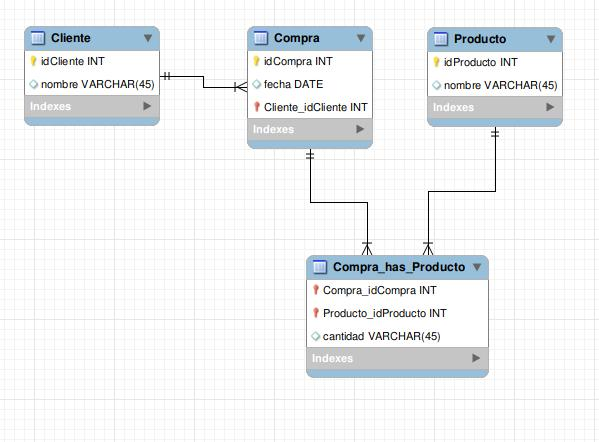

#### Modelo documento estructurado

Usuario: {  
    &nbsp;&nbsp;&nbsp;&nbsp;nombre: **String**,  
    &nbsp;&nbsp;&nbsp;&nbsp;compras: [ {  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;fecha: **Date**,  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;productos: [ {  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;nombre: **String**,  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cantidad: **Number**  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;} ]  
    &nbsp;&nbsp;&nbsp;&nbsp;} ]  
}    